<a href="https://colab.research.google.com/github/enVives/TFG/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from skimage import io
import kagglehub
import pandas as pd
from glob import glob
import cv2

!rm -rf /content/sample_data/*

!kaggle datasets download -d "kmader/skin-cancer-mnist-ham10000"

!unzip -o skin-cancer-mnist-ham10000.zip -d /content/sample_data/

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/sample_data/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/sampl

!rm -rf /content/sample_data/*

!kaggle datasets download -d "kmader/skin-cancer-mnist-ham10000"

!unzip -o skin-cancer-mnist-ham10000.zip -d /content/sample_data/

In [ ]:
dataset1 = pd.read_csv('/content/sample_data/hmnist_28_28_L.csv')
dataset2 = pd.read_csv('/content/sample_data/hmnist_8_8_L.csv')

In [ ]:
dataset1 = dataset1.drop(columns = dataset1.columns[784])
dataset2 = dataset2.drop(columns = dataset2.columns[64])
print(f"number of (columns,rows) {dataset1.shape}")
print(len(dataset1.iloc[0,:]))
print(dataset1.iloc[784,:].describe())

number of (columns,rows) (10015, 784)
784
count    784.000000
mean     136.783163
std       19.264348
min       30.000000
25%      130.000000
50%      140.000000
75%      148.000000
max      171.000000
Name: 784, dtype: float64


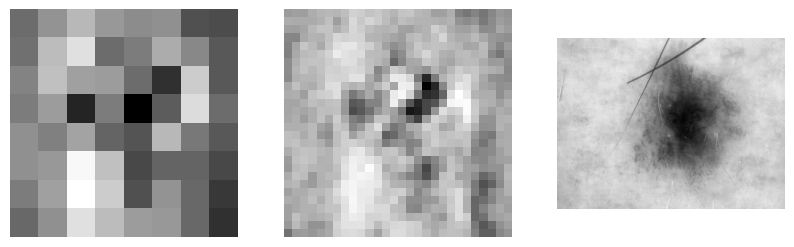

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

img1 = dataset2.iloc[0,:].to_numpy().reshape(8,8)
img2 = dataset1.iloc[0,:].to_numpy().reshape(28,28)
img3 = cv2.imread('/content/sample_data/HAM10000_images_part_1/ISIC_0024306.jpg',cv2.IMREAD_GRAYSCALE)

ax[0].imshow(img1,cmap='gray')
ax[0].axis('off')
ax[1].imshow(img2,cmap='gray')
ax[1].axis('off')
ax[2].imshow(img3,cmap='gray')
ax[2].axis('off')
io.show()

In [ ]:
metadates = pd.read_csv('/content/sample_data/HAM10000_metadata.csv')
metadates = metadates.sort_values(by='image_id')
metadates.head()
metadates['dx'].value_counts()

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


nv: melanocytic nevi

vasc: vascular lesions

mel:melanoma

df: dermatofibroma

bkl: benign keratosis-like lesions

bcc: basal cell carcinoma

akiec: Actinic keratoses and intraepithelial carcinoma / Bowen's disease